In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
def find_latest_log():
    folder = '../logger/logs'
    logs = os.listdir(folder)
    return folder + os.sep + logs[-1]


In [4]:

logfile = find_latest_log()
print(logfile)
df = pd.read_csv(logfile)
df


../logger/logs\log_230326_1420.csv


,time_ms,signal_0,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,signal_9
0,5150,0.0,0.0,0.0,0.0,0.0,1017.0,995.0,1033.0,0.0,0.0
1,5154,0.0,0.0,0.0,0.0,0.0,1026.0,1027.0,998.0,0.0,0.0
2,5158,0.0,0.0,0.0,0.0,0.0,1024.0,1029.0,1029.0,0.0,0.0
3,5162,0.0,0.0,0.0,0.0,0.0,1017.0,1002.0,1028.0,0.0,0.0
4,5166,0.0,0.0,0.0,0.0,0.0,1012.0,1012.0,1010.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1587,11526,0.0,0.0,0.0,0.0,0.0,1011.0,1004.0,1005.0,0.0,0.0
1588,11530,0.0,0.0,0.0,0.0,0.0,1031.0,1007.0,1019.0,0.0,0.0
1589,11534,0.0,0.0,0.0,0.0,0.0,1027.0,1003.0,1002.0,0.0,0.0
1590,11538,0.0,0.0,0.0,0.0,0.0,1023.0,1014.0,1035.0,0.0,0.0


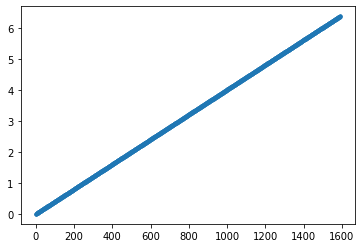

In [5]:
t = df['time_ms']*1/1000
t = t - t[0]
plt.plot(t,'.-')

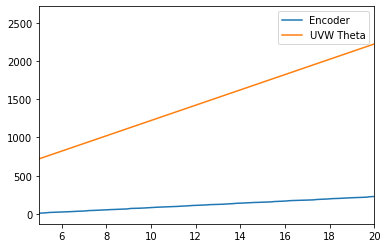

In [14]:
t = df['time_ms']*1/1000
t = t - t[0]

theta = df['signal_0']
#theta = np.mod(theta,360.0)
U = df['signal_1']
V = df['signal_2']
W = df['signal_3']

gen_theta =  df['signal_1']

xlim = (5,20.0)

plt.plot(t,theta,label='Encoder')
plt.plot(t,gen_theta,label='UVW Theta')

plt.xlim(xlim)
plt.legend()
#plt.figure()
#plt.plot(t,U)
#plt.plot(t,V)
#plt.plot(t,W)
#plt.xlim(xlim)



6.866280470990302


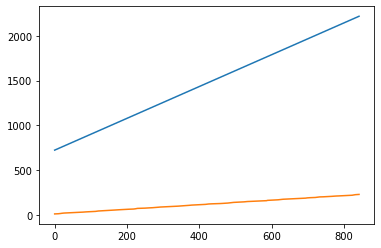

In [15]:
t = np.array(t)
indx = np.bitwise_and(t > xlim[0],t < xlim[1]) 

elec_ang = np.array(gen_theta)[indx]
enc_ang = np.array(theta)[indx]

plt.plot(elec_ang)
plt.plot(enc_ang)

enc_delta = np.max(enc_ang) - np.min(enc_ang)
elec_delta = np.max(elec_ang) - np.min(elec_ang)

print(elec_delta/enc_delta)
